# Comparison of chronograms obtained based on different molecules, different models or rate evolution, different tree models

First, let's open the chronograms.

In [18]:
import sys
from ete3 import Tree, TreeStyle, NodeStyle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import re


def readMAPChronogramFromRBOutput (file):
    try:
        f=open(file, 'r')
    except IOError:
        print ("Unknown file: "+file)
        sys.exit()
    line = ""
    treeStrings = list()
    for l in f:
        if "tree TREE1 = [&R]" in l:
            line = l.replace("tree TREE1 = [&R]", "")
            tree = re.sub('\[&index=\d+([,\w=\d,%\.\{\}])*\]', "", line)#[&index=102,posterior=1.000000,ccp=1.000000,height_95%_HPD={0.025722,0.071446}]
            #print(tree)
            return Tree(tree)

#t23SUCLN = Tree("23S/output/UCLNMAP.nhx")

t23SUCLN = readMAPChronogramFromRBOutput("23S/output/UCLNMAP.tre")
t16S23SUCLN = readMAPChronogramFromRBOutput("16S23S/output/UCLNMAP.tre")
t16SUCLN = readMAPChronogramFromRBOutput("16S/output/UCLNMAP.tre")






### All trees have been read, let's get their node heights, and compare them.

In [25]:
def getNodeHeights( t ):
    node2Height = dict()
    id2Height = dict()
    for node in t.traverse("postorder"):
        if node not in node2Height:
            node2Height[node] = 0.0
            id2Height[node.name] = 0.0
        if node.up:
            if node.up.name =='':
                leaves = node.up.get_leaves()
                name=""
                for l in leaves:
                    name += l.name
                node.up.name=name
            node2Height[node.up] = node2Height[node] + node.dist
            id2Height[str(node.up.name)] = node2Height[node] + node.dist
      # print node.name + " : " + str(node2Height[node])
    #return node2Height,id2Height
    return id2Height


heights23S = list(getNodeHeights(t23SUCLN).values())
heights16S23S = list(getNodeHeights(t16S23SUCLN).values())
heights16S = list(getNodeHeights(t16SUCLN).values())


Some plots:

In [32]:
def plotAndComputeCorrelation(x,y,namex, namey, logyn, logxn, limx=None, limy=None):
    print("Pearson correlation coefficient and p-value: "+ str(scipy.stats.pearsonr(x, y)))
    #Plotting:
    plt.plot(x, y, 'bo')
    plt.xlabel(namex, fontsize=15)
    plt.ylabel(namey, fontsize=15)
#plt.legend(['data'], loc='upper left')
    if logyn:
        plt.yscale('log')
    if logxn:
        plt.xscale('log')
    if not limx == None:
        plt.xlim(limx)
    if not limy == None:
        plt.ylim(limy)

Pearson correlation coefficient and p-value: (0.95641673011316142, 2.0533545940852737e-109)


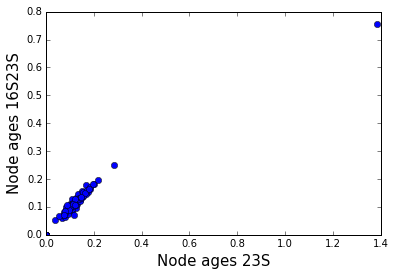

In [33]:
%matplotlib inline

plotAndComputeCorrelation(heights23S,heights16S23S,'Node ages 23S', 'Node ages 16S23S', False, False)

Pearson correlation coefficient and p-value: (0.99404879697582493, 1.6733761455743422e-195)


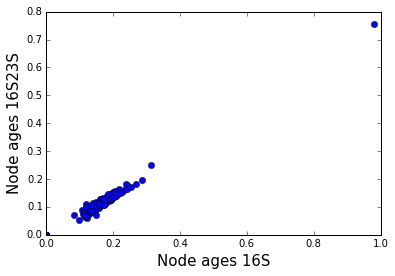

In [34]:
%matplotlib inline

plotAndComputeCorrelation(heights16S,heights16S23S,'Node ages 16S', 'Node ages 16S23S', False, False)

Pearson correlation coefficient and p-value: (0.93987606769313892, 9.8173929785950193e-96)


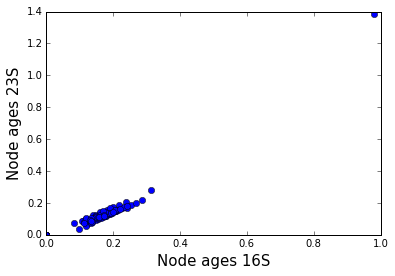

In [37]:
%matplotlib inline

plotAndComputeCorrelation(heights16S,heights23S,'Node ages 16S', 'Node ages 23S', False, False)

Let's zoom in a little bit.

Pearson correlation coefficient and p-value: (0.95641673011316142, 2.0533545940852737e-109)


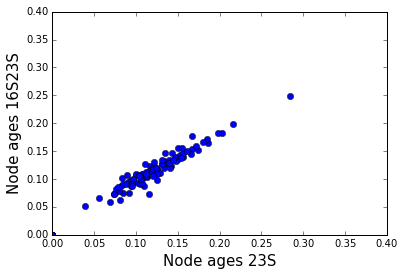

In [36]:
limx=list()
limx.append(0.0)
limx.append(0.4)
limy=list()
limy.append(0.0)
limy.append(0.4)




%matplotlib inline

plotAndComputeCorrelation(heights23S,heights16S23S,'Node ages 23S', 'Node ages 16S23S', False, False, limx, limy)

Pearson correlation coefficient and p-value: (0.99404879697582493, 1.6733761455743422e-195)


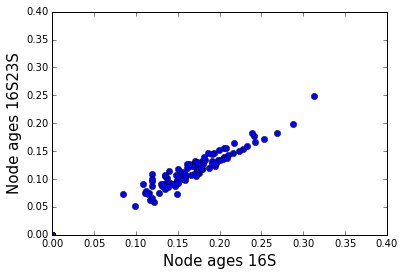

In [38]:
%matplotlib inline

plotAndComputeCorrelation(heights16S,heights16S23S,'Node ages 16S', 'Node ages 16S23S', False, False, limx, limy)

Pearson correlation coefficient and p-value: (0.93987606769313892, 9.8173929785950193e-96)


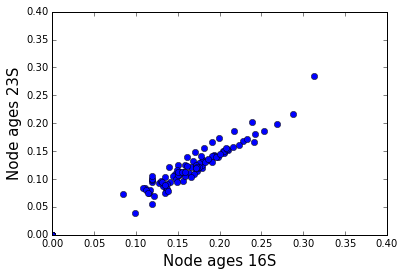

In [39]:
%matplotlib inline

plotAndComputeCorrelation(heights16S,heights23S,'Node ages 16S', 'Node ages 23S', False, False, limx, limy)